In [1]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import pandas as pd
import ES3 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [2]:
def estatisticas(dado_boia, results_modelo):
    """
    Calcula as estatisticas dos resultados do modelo
    dado_boia = coluna com dados da boia do dataframe (a priori, hs)
    result_modelo = coluna com resultados do modelo do dataframe (a priori, hs)
    """

    corr = dado_boia.corr(results_modelo)  # modelo e dado
    bias = np.mean(results_modelo-dado_boia)  # modelo e dado
    rmse = np.sqrt(np.sum((results_modelo - dado_boia)**2) /len(dado_boia))  # modelo e dado
    si = rmse/np.mean(dado_boia)  # dado
    N = len(dado_boia.dropna())  
    
    return corr, bias, rmse,  si,  N

In [3]:
df_era = pd.DataFrame()
era5_path = os.getcwd() + '/era5'
for i in os.listdir(era5_path):
    ds = xr.open_dataset(era5_path + '/' + i)
    df = ds.sel(longitude=-43, latitude=-23).to_dataframe()
    df.pop('latitude')
    df.pop('longitude')
    df_era = df_era.append(df)

In [4]:
boia1 = ES3.trata_dado('dados/SIMCOSTA_RJ-1_OCEAN_2015-07-29_2016-10-13.csv')
boia1.columns = ['Hs1', 'Tp1', 'Dir1', 'DirN1', 'Decl1']

In [5]:
boia2 = ES3.trata_dado('dados/SIMCOSTA_RJ-2_OCEAN_2015-07-29_2016-12-20.csv')
boia2.columns = ['Hs2', 'Tp2', 'Dir2', 'DirN2', 'Decl2']

In [6]:
boia3 = ES3.trata_dado('dados/SIMCOSTA_RJ-3_OCEAN_2016-07-14_2022-01-26.csv')
boia3.columns = ['Hs3', 'Tp3,', 'Dir3', 'DirN3', 'Decl3']
boia3 = boia3[:'2021-12-31']

In [7]:
boia4 = ES3.trata_dado('dados/SIMCOSTA_RJ-4_OCEAN_2017-08-28_2022-01-25.csv')
boia4.columns = ['Hs4', 'Tp4', 'Dir4', 'DirN4', 'Decl4']
boia4 = boia4[:'2021-12-31']

In [8]:
geral = pd.concat([boia1, boia2, boia3, boia4, df_era], axis=1)

In [9]:
geral_treated = geral.resample('1H').mean()

In [10]:
geral_treated['Hs1'].index[0]

Timestamp('2014-01-01 00:00:00', freq='H')

In [11]:
hss = ['Hs1', 'Hs2', 'Hs3', 'Hs4']

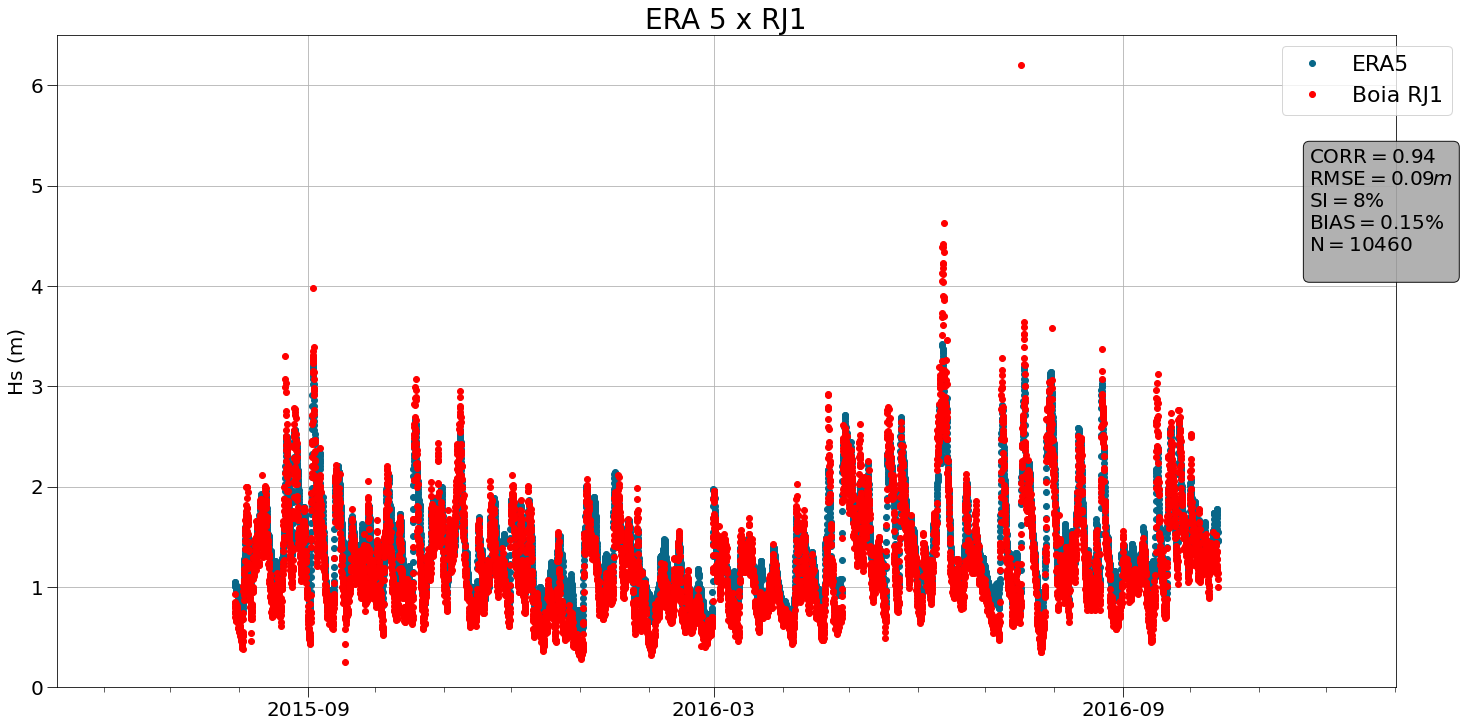

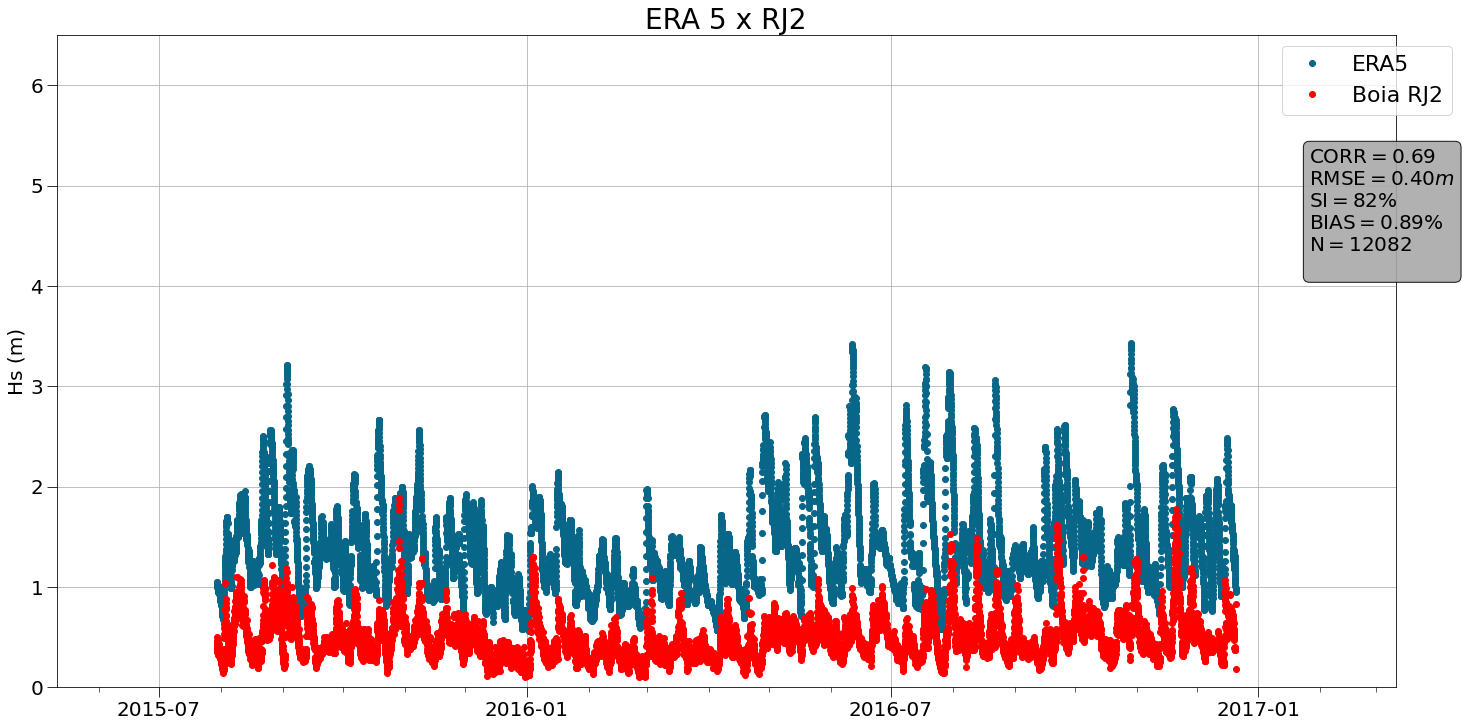

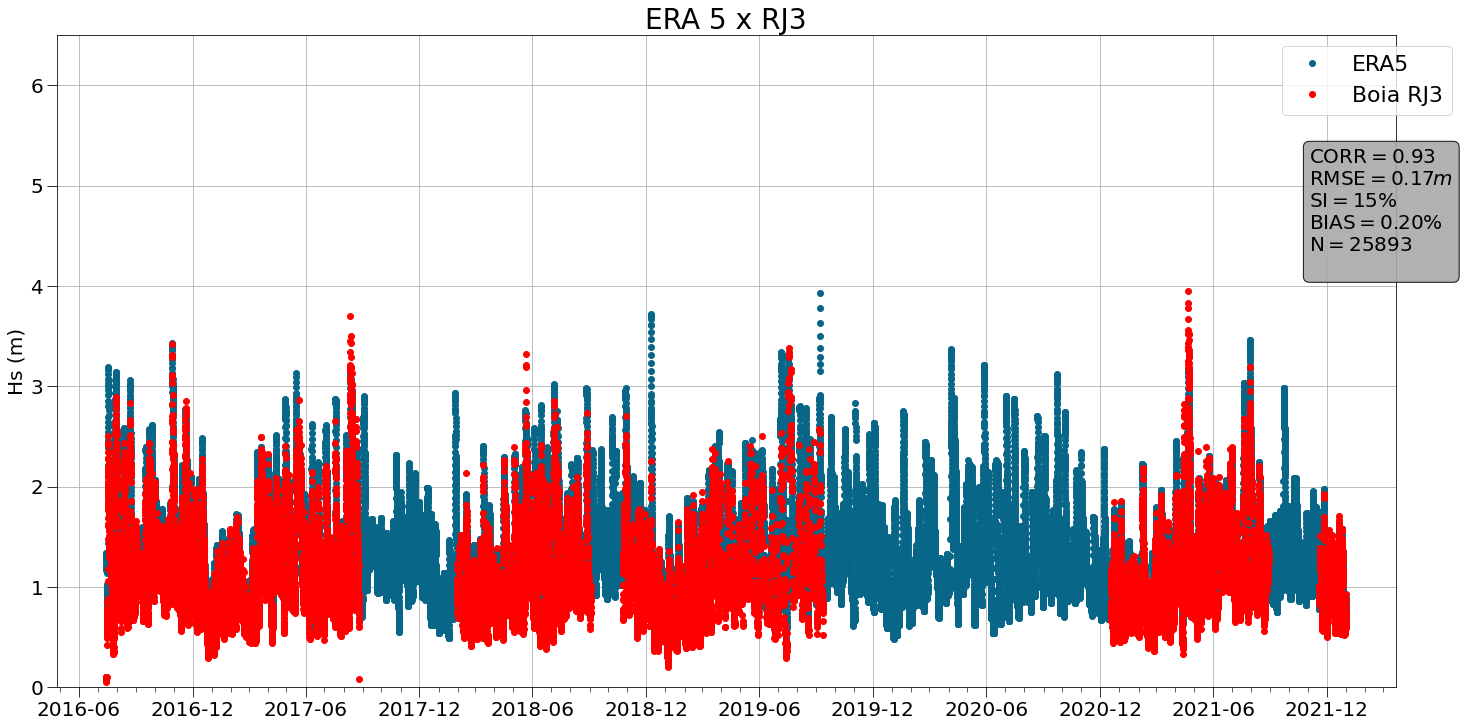

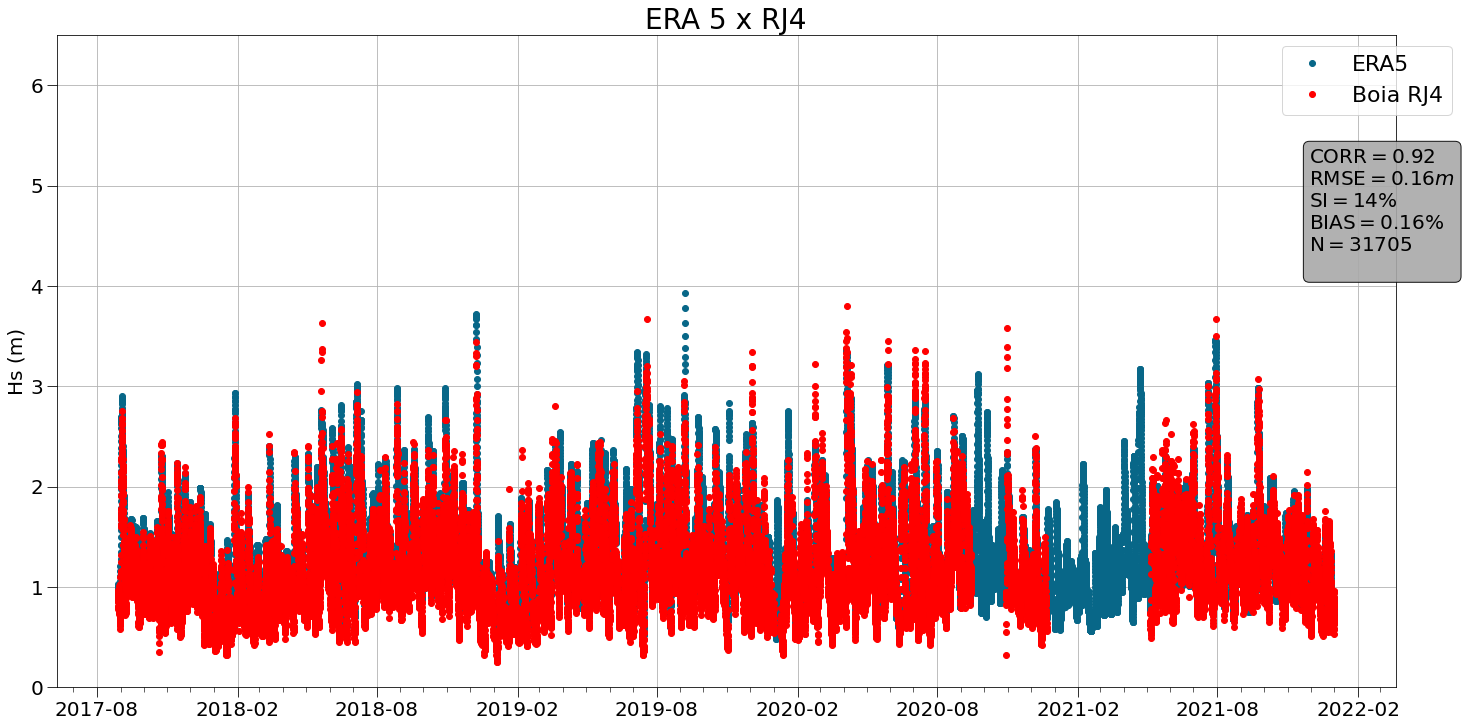

In [12]:
hss = ['Hs1', 'Hs2', 'Hs3', 'Hs4']

import os
figpath = os.getcwd()+'/fig/'

from datetime import timedelta

for i in hss:
    hsera5 = geral_treated['swh'][geral_treated[i].dropna().index[0]: geral_treated[i].dropna().index[-1]]
    
    fig = plt.figure(figsize=(24,12))

    ax = fig.add_subplot(111)
    ax.plot(hsera5, marker = 'o', color = '#086788', linestyle = 'none', label = 'ERA5')
    ax.plot(geral_treated[i], marker = 'o', color = 'red', linestyle = 'none', label='Boia RJ'+i[2])


    ax.grid()
    ax.set_ylabel('Hs (m)', fontsize = 20)

    ################################# data #######################

    # Major ticks every 6 months.
    fmt_half_year = mdates.MonthLocator(interval=6)
    ax.xaxis.set_major_locator(fmt_half_year)

    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(fmt_month)

    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


    ax.tick_params(axis='both', which='major', labelsize=20, size=10)
    ax.tick_params(axis='both', which='minor', size=5)

    ax.set_ylim(0,6.5)
    
    ax.set_xlim(geral_treated[i].dropna().index[0] -timedelta(days=80) , geral_treated[i].dropna().index[-1] + timedelta(days=80))
    # ax.set_xlim(1,12)
    ax.legend(fontsize = 22, bbox_to_anchor=(1.05, 1))

    ###########################################################################

    plt.title('ERA 5 x RJ' + i[2], fontsize = 28)
    
    
    #################### METRICAS ESTATISTICAS ###################
    
    
    CORR, BIAS, RMSE, SI, N = estatisticas(geral_treated[i], geral_treated['swh'])
    
    
    textstr = '$\mathrm{CORR}=%.2f$\n$\mathrm{RMSE}=%.2f  m$\n$\mathrm{SI}=%.0f \%%$\n$\mathrm{BIAS}=%.2f \%%$\n$\mathrm{N}=%.0f$\n ' % (
    CORR, RMSE, SI*100, BIAS, N)
# Caracteristicas da caixa de texto
    props = dict(boxstyle='round', facecolor='darkgray', alpha=0.9)
    # ax.text(hsera5.index[int(len(geral_treated[i].dropna())/2)], 5.5, textstr, fontsize=20,
    #      verticalalignment='top', bbox=props)  # Unindo caixa e texto
    trans = fig.transFigure
    plt.text(0.85,0.75 , textstr, transform=trans, fontsize=20,
          verticalalignment='top', bbox=props)  # Unindo caixa e texto

    plt.savefig(figpath+'compara_era5_rj'+i[2]+'.png')

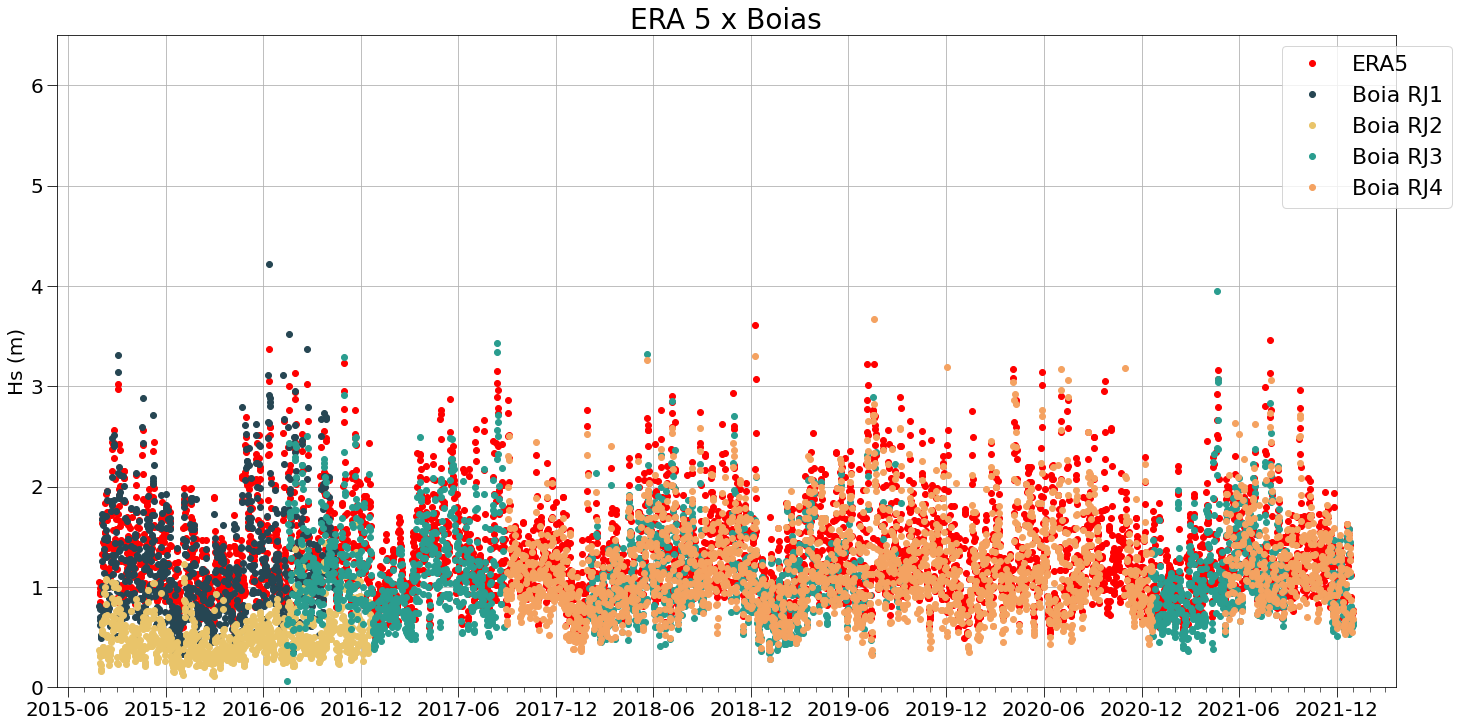

In [19]:

hsera5 = geral_treated['swh'][geral_treated['Hs1'].dropna().index[0]: geral_treated['Hs4'].dropna().index[-1]]

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(hsera5[::12], marker = 'o', color = 'red', linestyle = 'none', label = 'ERA5')
ax.plot(geral_treated['Hs1'][::12], marker = 'o', color = '#264653', linestyle = 'none', label='Boia RJ1')
ax.plot(geral_treated['Hs2'][::12], marker = 'o', color = '#e9c46a', linestyle = 'none', label='Boia RJ2')
ax.plot(geral_treated['Hs3'][::12], marker = 'o', color = '#2a9d8f', linestyle = 'none', label='Boia RJ3')
ax.plot(geral_treated['Hs4'][::12], marker = 'o', color = '#f4a261', linestyle = 'none', label='Boia RJ4')




ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_ylim(0,6.5)

ax.set_xlim(geral_treated['Hs1'].dropna().index[0] -timedelta(days=80) , geral_treated['Hs4'].dropna().index[-1] + timedelta(days=80))
# ax.set_xlim(1,12)
ax.legend(fontsize = 22, bbox_to_anchor=(1.05, 1))

###########################################################################

plt.title('ERA 5 x Boias', fontsize = 28)



plt.savefig(figpath+'compara_era5_boias.png')

In [14]:
import basemap

ModuleNotFoundError: No module named 'basemap'

In [ ]:
geral_treated[i].index[0] - timedelta(days=80)

In [ ]:
geral_treated[i].index[-1]

In [ ]:
CORR_mag = estatisticas(inner_anemotu['Velocidade do Vento (km/h)'], inner_anemotu['mag10'])[0]
BIAS_mag = estatisticas(inner_anemotu['Velocidade do Vento (km/h)'], inner_anemotu['mag10'])[1]
NBIAS_mag = estatisticas(inner_anemotu['Velocidade do Vento (km/h)'], inner_anemotu['mag10'])[2]
RMSE_mag = estatisticas(inner_anemotu['Velocidade do Vento (km/h)'], inner_anemotu['mag10'])[3]
NRMSE_mag = estatisticas(inner_anemotu['Velocidade do Vento (km/h)'], inner_anemotu['mag10'])[4]
SI_mag = estatisticas(inner_anemotu['Velocidade do Vento (km/h)'], inner_anemotu['mag10'])[6]

In [ ]:
np.corrcoef(np.asarray(geral_treated['swh']), np.asarray(geral_treated['Hs4']))

In [ ]:
np.asarray(geral_treated['swh'])

In [ ]:
estatisticas( geral_treated['Hs3'] , geral_treated['swh'])

In [ ]:
hour = pd.to_timedelta(geral.index.hour, unit='H')

In [ ]:
geral.groupby(hour).mean()